<a href="https://colab.research.google.com/github/heokwon/Algorithm_Study/blob/main/Do_it!/8)%EB%A6%AC%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 리스트
* 연결 리스트
* 포인터를 이용한 연결 리스트
* 커서를 이용한 연결 리스트
* 원형 이중 연결 리스트

## 연결 리스트
리스트는 데이터에 순서를 매겨 늟어놓은 자료구조이다. 구조가 단순한 리스트로 선형리스트(linear list) 또는 연결 리스트(linked list)가 있다.

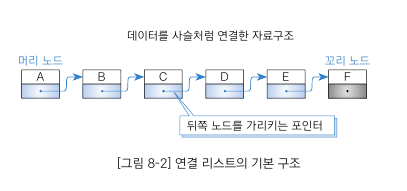

위 그림은 연결 리스트의 기본 구조이다. A에서 F까지 데이터가 순서대로 나열되고 각 데이터가 화살표로 연결되어 있다. 마치 A가 B에게, B가 C에게 차례대로 연락하는 비상 연락망과 같은 구조이다. 이런 구조에서는 누군가를 건너뛰거나 뒤돌아 앞 사람에게 연락해서는 안된다.

연결 리스트에서 각각의 원소(element)를 노드(node)라고 한다. 노드가 갖고 있는 것은 데이터와 뒤쪽 노드를 가리키는(참조하는) 포인터(pointer)이다. 특별히 맨 앞에 있는 노드를 머리 노드(head node), 맨 끝에 있는 노드를 꼬리 노드(tail node)라고 한다. 또 각 노드에서 바로 앞에 있는 노드를 앞쪽 노드(predecessor node),바로 뒤에 있는 노드를 뒤쪽 노드(successor node) 라고 한다.

## 포인터를 이용한 연결 리스트
연결 리스트에 데이터를 삽입할 때 노드용 인스턴스를 생성하고, 데이터를 삭제할 때 노드용 인스턴스를 없애면 앞에서 제시한 데이터를 옮기는 문제를 해결할 수 있다. 이러한 노드를 구현하는 클래스 Node를 아래 그림에 나타냈다.

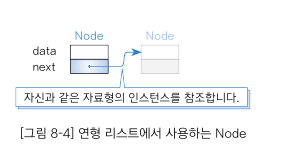

Node느 데이터용 필드 data와는 별도로 자신과 같은 클래스형의 인스턴스를 참조하기 위한 참조용 필드 next를 갖는다. 이처럼 자신과 같은 형의 인스턴스를 참조하는 필드가 있는 구조를 자기참조(self-referential)형 이라고 한다.

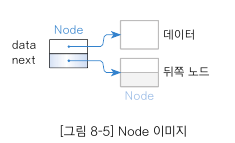

위 그림은 Node를 좀 더 자세히 나타낸 것이다. 여기에서 data는 데이터 자체가 아니라 '데이터에 대한 참조'이고 next는 '노드에 대한 참조'이다.

뒤쪽 노드를 참조하는 필드 next를 뒤쪽 포인터라고 가정한다. 뒤쪽 포인터 next에는 뒤쪽 노드에 대한 참조를 저장한다. 뒤쪽 노드가 없는 꼬리 노드의 뒤쪽 포인터 값은 None이다.

In [ ]:
## 포인터로 연결 리스트 구현하기

from __future__ import annotations
from typing import Any, Type

class Node:
    """연결 리스트용 노드 클래스"""

    def __init__(self, data:Any=None, next:Node=None):
        """초기화"""
        self.data=data  # 데이터
        self.next=next  # 뒤쪽 포인터

**노드 클래스Node**

<br>

노드 클래스 Node에는 다음과 같은 필드와 __init__() 함수가 있다.

<br>

**필드**

앞에서 살펴보았듯이 노드 클래스 Node는 다음과 같이 필드 2개로 구성된다.
* data: 데이터(데이터에 대한 참조: 임의의 형).
* next: 뒤쪽 포인터(뒤쪽 노드에 대한 참조: Node형).

<br>

**__init__() 함수**

__init__()함수는 전달받은 data와 next를 해당 필드에 대입한다. 호출할 떄 어떤 인수도 생략할 수 있으며, 생략할 경우에는 None으로 간주한다.

In [ ]:
class LinkedList:
    """연결 리스트 클래스"""

    def __init__(self) -> None:
        """초기화"""
        self.no = 0          # 노드의 개수
        self.head = None     # 머리 노드
        self.current = None  # 주목 노드

    def __len__(self) -> int:
        """연결 리스트의 노드 개수를 변환"""
        return self.no

**연결 리스트 클래스 LinkedList**

연결 리스트 클래스 LinkedList는 다음과 같이 필드 3개로 구성됩니다.
* no: 리스트에 등록되어 잇는 노드의 개수
* head: 머리 노드에 대한 참조
* current: 현재 주목하고 있는 노드에 대한 참조이며, 리스트에서 노드를 검색하여 그 노드를 주목한 직후에 노드를 삭제하는 등의 용도로 사용

In [ ]:
from __future__ import annotations
from typing import Any, Type

class Node:
    """연결 리스트용 노드 클래스"""

    def __init__(self, data:Any=None, next:Node=None):
        """초기화"""
        self.data=data  # 데이터
        self.next=next  # 뒤쪽 포인터

class LinkedList:
    """연결 리스트 클래스"""

    def __init__(self) -> None:
        """초기화"""
        self.no = 0          # 노드의 개수
        self.head = None     # 머리 노드
        self.current = None  # 주목 노드

    def __len__(self) -> int:
        """연결 리스트의 노드 개수를 변환"""
        return self.no
    
    def search(self, data:Any) -> int:
        """data와 값이 같은 노드 검색"""
        cnt = 0
        ptr = self.head
        while ptr is not None:
            if  ptr.data == data:
                self.current = ptr
                return cnt
            cnt += 1
            ptr = ptr.next
        return -1

    def __contains__(self, data:Any) -> bool:
        """연결 리스트에 data가 포함되어 있는지 확인"""
        return self.search(data) >= 0

    # 머리에 노드를 삽입하는 함수
    def add_first(self, data:Any) -> None:
        """맨 앞에 노드를 삽입"""
        ptr = self.head  # 삽입하기 전의 노드
        self.head = self.current = Node(data, ptr)
        self.no += 1

    # 꼬리에 노드를 삽입하는 함수
    def add_last(self, data:Any):
        """맨 끝에 노드를 삽입"""
        if self.head is None:    # 리스트가 비어 있으면
            self.add_first(data) # 맨 앞에 노드를 삽입
        else:
            ptr = self.head
            while ptr.next is not None:
                ptr = ptr.next
            ptr.next = self.current = Node(data, None)
            self.no += 1

    # 머리 노드를 삭제하는 함수
    def remove_first(self) -> None:
        """머리 노드를 삭제"""
        if self.head is not None:      # 리스트가 비어 있으면
            self.head = self.current = self.head.next
        self.no -= 1

    # 꼬리 노드를 삭제하는 함수
    def remove_last(self) -> None:
        """꼬리 노드를 삭제"""
        if self.head is not None:
            if self.head.next is None:  # 노드가 1개 뿐이라면
                self.remove_first()     # 머리 노드를 삭제
            else:
                ptr = self.head         # 스캔 중인 노드
                pre = self.head         # 스캔 중인 노드의 앞쪽 노드

                while ptr.next is not None:
                    pre = ptr
                    ptr = ptr.next
                pre.next = None         # pre는 삭제 뒤 꼬리 노드
                self.current = pre
                self.no -= 1

    # 임의의 노드를 삭제하는 함수
    def remove(self, p:Node) -> None:
        """노드 p를 삭제"""
        if self.head is not None:
            if p is self.head:       # p가 머리 노드이면
                self.remove_first()  # 머리 노드를 삭제
            else:
                ptr = self.head

                while ptr.next is not p:
                    ptr = ptr.next
                    if ptr is None:
                        return       # ptr은 리스트에 존재하지 않음
                ptr.next = p.next
                self.current = ptr
                self.no -= 1

    # 주목 노드를 삭제하는 함수
    def remove_current_node(self) -> None:
        """주목 노드를 삭제"""
        self.remove(self.current)

    # 모든 노드를 삭제하는 함수
    def clear(self) -> None:
        """전체 노드를 삭제"""
        while self.head is not None:
            self.remove_first()
        self.current = None
        self.no = 0

    # 주목 노드를 한 칸 뒤로 이동시키는 함수
    def next(self) -> bool:
        """주목 노드를 한 칸 뒤로 이동"""
        if self.current is None or self.current.next is None:
            return False                # 이동할 수 없음
        self.current = self.current.next
        return True

    # 주목 노드를 출력하는 함수
    def print_current_node(self) -> None:
        """주목 노드를 출력"""
        if self.current is None:
            print('주목 노드가 존재하지 않습니다.')
        else:
            print(self.current.data)

    # 모든 노드를 출력하는 함수
    def print(self) -> None:
        """모든 노드를 출력"""
        ptr = self.head

        while ptr is not None:
            print(ptr.data)
            ptr = ptr.next

    def __iter__(self) -> LinkedListIterator:
        """이터레이터를 반환"""
        return LinkedListIterator(self.head)

class LinkedListIterator:
    """클래스 LinkedList의 이터레이터용 클래스"""

    def __init__(self, head:Node):
        self.current = head

    def __iter__(self) -> LinkedListIterator:
        return self

    def __next__(self) -> Any:
        if self.current is None:
            raise StopIteration
        else:
            data = self.current.data
            self.current = self.current.next
            return data

## 포인터로 연결 리스트 프로그램 만들기

In [ ]:
from enum import Enum
# from linked_list import LinkedList

Menu = Enum('Menu', ['머리에노드삽입','꼬리에노드삽입','머리노드삭제',
                     '꼬리노드삭제','주목노드출력','주목노드이동',
                     '주목노드삭제','모든노드삭제','검색','멤버십판단',
                     '모든노드출력','스캔','종료'])

def select_Menu() -> Menu:
    """메뉴 선택"""
    s = [f'({m.value}){m.name}' for m in Menu]
    while True:
        print(*s, sep= '  ',end='')
        n = int(input(': '))
        if 1 <= n <= len(Menu):
            return Menu(n)

lst = LinkedList()

while True:
    menu = select_Menu()

    if menu == Menu.머리에노드삽입:
        lst.add_first(int(input('머리 노드에 넣을 값을 입력하세요.: ')))
    
    elif menu == Menu.꼬리에노드삽입:
        lst.add_last(int(input('꼬리 노드에 넣을 값을 입력하세요.: ')))
    
    elif menu == Menu.머리노드삭제:
        lst.remove_first()

    elif menu == Menu.꼬리노드삭제:
        lst.remove_last()

    elif menu == Menu.주목노드출력:
        lst.print_current_node()
    
    elif menu == Menu.주목노드이동:
        lst.next()
    
    elif menu == Menu.주목노드삭제:
        lst.remove_current_node()

    elif menu == Menu.모든노드삭제:
        lst.clear()

    elif menu == Menu.검색:
        pos = lst.search(int(input('검색할 값을 입력하세요.: ')))
        if pos >= 0:
            print(f'그 값의 데이터는 {pos+1}번째에 있습니다.')
        else:
            print('해당하는 데이터가 없습니다.')

    elif menu == Menu.멤버십판단:
        print('그 값의 데이터는 포함되어'
        +(' 있습니다.' if int(input('판단할 값을 입력하세요.: ')) in lst else
          '있지 않습니다.'))
        
    elif menu == Menu.모든노드출력:
        lst.print()

    elif menu == Menu.스캔:
        for e in lst:
            print(e)

    else:
       break

(1)머리에노드삽입  (2)꼬리에노드삽입  (3)머리노드삭제  (4)꼬리노드삭제  (5)주목노드출력  (6)주목노드이동  (7)주목노드삭제  (8)모든노드삭제  (9)검색  (10)멤버십판단  (11)모든노드출력  (12)스캔  (13)종료: 1
머리 노드에 넣을 값을 입력하세요.: 1
(1)머리에노드삽입  (2)꼬리에노드삽입  (3)머리노드삭제  (4)꼬리노드삭제  (5)주목노드출력  (6)주목노드이동  (7)주목노드삭제  (8)모든노드삭제  (9)검색  (10)멤버십판단  (11)모든노드출력  (12)스캔  (13)종료: 2
꼬리 노드에 넣을 값을 입력하세요.: 5
(1)머리에노드삽입  (2)꼬리에노드삽입  (3)머리노드삭제  (4)꼬리노드삭제  (5)주목노드출력  (6)주목노드이동  (7)주목노드삭제  (8)모든노드삭제  (9)검색  (10)멤버십판단  (11)모든노드출력  (12)스캔  (13)종료: 1
머리 노드에 넣을 값을 입력하세요.: 10
(1)머리에노드삽입  (2)꼬리에노드삽입  (3)머리노드삭제  (4)꼬리노드삭제  (5)주목노드출력  (6)주목노드이동  (7)주목노드삭제  (8)모든노드삭제  (9)검색  (10)멤버십판단  (11)모든노드출력  (12)스캔  (13)종료: 2
꼬리 노드에 넣을 값을 입력하세요.: 12
(1)머리에노드삽입  (2)꼬리에노드삽입  (3)머리노드삭제  (4)꼬리노드삭제  (5)주목노드출력  (6)주목노드이동  (7)주목노드삭제  (8)모든노드삭제  (9)검색  (10)멤버십판단  (11)모든노드출력  (12)스캔  (13)종료: 1
머리 노드에 넣을 값을 입력하세요.: 15
(1)머리에노드삽입  (2)꼬리에노드삽입  (3)머리노드삭제  (4)꼬리노드삭제  (5)주목노드출력  (6)주목노드이동  (7)주목노드삭제  (8)모든노드삭제  (9)검색  (10)멤버십판단  (11)모든노드출력  (12)스캔  (13)종료: 4
(1)머리에노드삽입  (2)꼬리에노드삽입  (3)머리노드삭제  (4)꼬리노드삭제  (5)주목노드출

## 커서를 이용한 연결 리스트
노드를 삽입,삭제할 때마다 내부에서 노드용 인스턴스를 생성하고 소멸한다. 이때 메모리를 확보하고 해제하는 데 쓰는 비용을 결코 무시할 수 없다. 프로그램을 실행하면서 데이터 개수가 큭 ㅔ변하지 않거나 데이터 최대 개수를 예측할 수 있는 경우라면 다음 그림처럼 배열 안의 원소를 사용하여 효율적으로 운용할 수 있다.

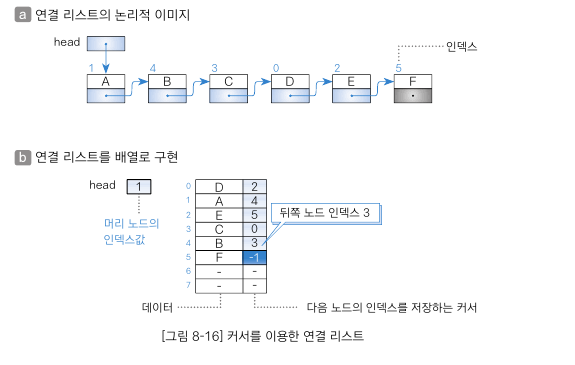

뒤쪽 포인터는 뒤쪽 노드가 저장되는 원소의 인덱스이다. 여기서는 int형 정숫값인 인덱스로 나타낸 포인터를 커서(cursor)라고 한다. 예를 들어 노드 B의 뛰쪽 커서 3 은 뒤쪽 노드 C가 인덱스 3의 위치에 들어 있다는 것을 나타낸다. 위 그림에서 꼬리 노드 F의 뒤쪽 커서는 -1로 되어있다. 머리 노드를 나타내는 head도 커서이다. 위 그림에서 머리 노드 A가 저장되어 있는 인덱스인 1은 head값이다.


In [ ]:
# 커서로 연결 리스트 구현하기

from __future__ import annotations
from typing import Any, Type

Mull = -1

class Node:
    """연결 리스트용 노드 클래스(배열 커서 버전)"""

    def __init__(self, data=Null, next=Null, dnext=Null):
        """초기화"""
        self.data = data     # 데이터
        self.next = next     # 리스트의 뒤쪽 포인터
        self.dnext = dnext   # 프리 리스트의 뒤쪽 포인터

class ArrayLinkedList:
    """연결 리스트 클래스(배열 커서 버전)"""

    def __init__(self, capacityL int):
        """초기화"""
        self.head = Null     # 머리 노드
        self.current = Null  # 주목 노드
        self.max = Null      # 사용 중인 꼬리 레코드
        self.deleted = Null  # 프리 리스트의 머리 노드
        self.capacity = capacity # 리스트의 크기
        self.n = [Node()]*self.capacity
        self.no = 0

    def __len__(self) -> int:
        """연결 리스트의 노드 수를 반환"""
        return self.no
    
    def get_insert_index(self):
        """다음에 삽입할 레코드의 인덱스를 구함"""
        if self.deleted == Null:     # 삭제 레코드는 존재하지 않음
            if self.max + 1 < self.capacity:
                self.max += 1
                return self.max      # 새 레코드를 사용
            else:
                return Null          # 크기 초과
        else:
            rec = self.deleted
            self.deleted = self.n[rec].dnext  # 프리 리스트에서 맨 앞 rec를 꺼내기
            return rec

      def deleted_index(self, idx: int) -> int:
          """레코드 idx를 프리 리스트에 등록"""
          if self.deleted == Null:            # 삭제 레코드는 존재하지 않음
              self.deleted = idx
              self.n[idx].dnext = Null        # idx를 프리 리스트의 맨 앞에 등록
          else:
              rec = self.deleted
              self.deleted = idx
              self.n[idx].dnext = rec
      
      def search(self, data: Any) -> int:
          """data와 값이 같은 노드를 검색"""
          cnt = 0
          ptr = self.head      # 현재 스캔중인 노드
          while ptr != Null:
              if self.n[ptr].data == data:
                  self.current = ptr
                  return cnt   # 검색 성공
              cnt += 1
              ptr = self.n[ptr].next  # 뒤쪽 노드에 주목
          return Null          # 검색 싫패

      def __contains__(self, data: Any) -> bool:
          """연결 리스트에 data가 포함되어 있는지 확인"""
          return self.search(data) >= 0
      
      def add_first(self, data:Any):
          """머리 노드에 삽입"""
          ptr = self.head         # 삽입하기 전의 머리 노드
          rec = self.get_insert_index()
          if rec != Null:
              self.head = self.current = rec # rec번째 레코드에 삽입
              self.n[self.head] = Node(data, ptr)
              self.no += 1

      def add_last(self, data:Any) -> None:
          """꼬리 노드에 삽입"""
          if self.head == Null:      # 리스트가 비어 있으면
              self.add_first(data)   # 맨 앞에 노드 삽입